### *Note: This notebook is part of the [Bike Share Company Case Study](https://www.kaggle.com/code/linarabzalov/bike-share-company-case-study)*

First, let's download the necessary libraries and our data.

In [1]:
library(readr)
library(dplyr)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
trips_cleaned_v2 <- read_csv("/kaggle/input/cleaned-bike-share-company-data/trips_cleaned_v2.csv")

Rows: 5473753 Columns: 16


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (5): start_lat, start_lng, end_lat, end_lng, trip_duration
dttm (2): started_at, ended_at



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


To simplify the code, I will clear the data from empty values and divide it by user type

In [3]:
trips_cleaned_members <- filter(trips_cleaned_v2, member_casual == 'member' & start_station_name != '' & end_station_name != '')
trips_cleaned_casuals <- filter(trips_cleaned_v2, member_casual == 'casual' & start_station_name != '' & end_station_name != '')

I decided to identify popular routes and see if there is anything meaningful in this data. As a route, I will consider a combination of the starting and ending stations, their popularity is estimated by the number of trips in descending order.

In [4]:
# Creating separated data frames for member users.
trips_cleaned_members %>%
    mutate(route = paste(start_station_name, end_station_name, sep = ' - ')) %>%
    group_by(route) %>%
    count(name = 'number_of_trips') %>%
    arrange(desc(number_of_trips)) %>%
    head(10)
# Creating separated data frames for casual users.
trips_cleaned_casuals %>%
    mutate(route = paste(start_station_name, end_station_name, sep = ' - ')) %>%
    group_by(route) %>%
    count(name = 'number_of_trips') %>%
    arrange(desc(number_of_trips)) %>%
    head(10)

route,number_of_trips
<chr>,<int>
State St & 33rd St - Calumet Ave & 33rd St,5918
Calumet Ave & 33rd St - State St & 33rd St,5829
Ellis Ave & 60th St - Ellis Ave & 55th St,3929
University Ave & 57th St - Ellis Ave & 60th St,3912
Ellis Ave & 60th St - University Ave & 57th St,3899
Ellis Ave & 55th St - Ellis Ave & 60th St,3823
Loomis St & Lexington St - Morgan St & Polk St,2685
Morgan St & Polk St - Loomis St & Lexington St,2399
MLK Jr Dr & 29th St - State St & 33rd St,2072


route,number_of_trips
<chr>,<int>
Streeter Dr & Grand Ave - Streeter Dr & Grand Ave,4891
DuSable Lake Shore Dr & Monroe St - DuSable Lake Shore Dr & Monroe St,4364
DuSable Lake Shore Dr & Monroe St - Streeter Dr & Grand Ave,4274
Michigan Ave & Oak St - Michigan Ave & Oak St,2115
Millennium Park - Millennium Park,2103
Streeter Dr & Grand Ave - DuSable Lake Shore Dr & Monroe St,2094
Dusable Harbor - Dusable Harbor,2047
Shedd Aquarium - DuSable Lake Shore Dr & Monroe St,1994
Dusable Harbor - Streeter Dr & Grand Ave,1961


The sum of trips on the 10 most popular routes is about 0.7% and 0.5% of all data. I don't find this to be an important factor for analysis. However, it may be more useful to know the popular stations.
Since I want to assess how popular a particular station is, I will do this by estimating the frequency of use of this station, in which case I will need a combined table of strat and end stations.

In [5]:
# Creating new dataframes with combined information about starting and ending stations. 
stations_members <- bind_rows(
  trips_cleaned_members %>%
    select(station = start_station_name, lat = start_lat, lng = start_lng),
  trips_cleaned_members %>%
    select(station = end_station_name, lat = end_lat, lng = end_lng)
)

stations_casuals <- bind_rows(
  trips_cleaned_casuals %>%
    select(station = start_station_name, lat = start_lat, lng = start_lng),
  trips_cleaned_casuals %>%
    select(station = end_station_name, lat = end_lat, lng = end_lng)
)

Now that I have dataframes with all the stations that have been used, I can group this data to see how popular each station is and use this data in QGIS to create a map.

In [6]:
stations_members %>%
    group_by(station) %>%
    summarise(lat = mean(lat), lng = mean(lng), frequency = n()) %>%
    filter(frequency > 10) %>%
    write_csv("stations_members.csv")

stations_casuals %>%
    group_by(station) %>%
    summarise(lat = mean(lat), lng = mean(lng), frequency = n()) %>%
    filter(frequency > 10) %>%
    write_csv("stations_casuals.csv")

Currently, there are many services that provide the ability to visualize geographical data, but due to the volume of data, I decided that using QGIS would be the best option.  In addition, GIS has more extensive map customization capabilities.

I used a heat map to analyze the data, below you can see these maps, where orange shows the areas where people use the service most often, as well as the 10 most popular stations.

### Casuals
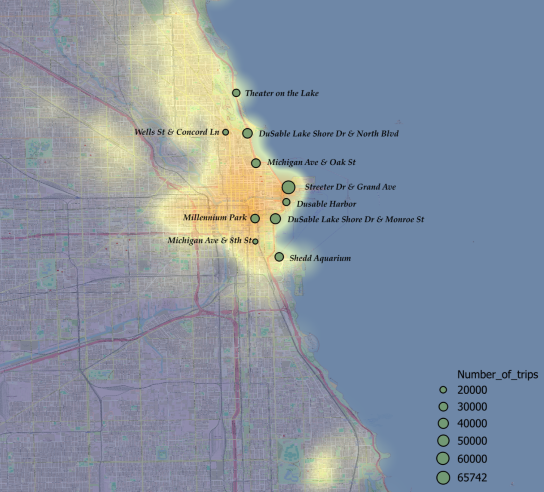

### Members
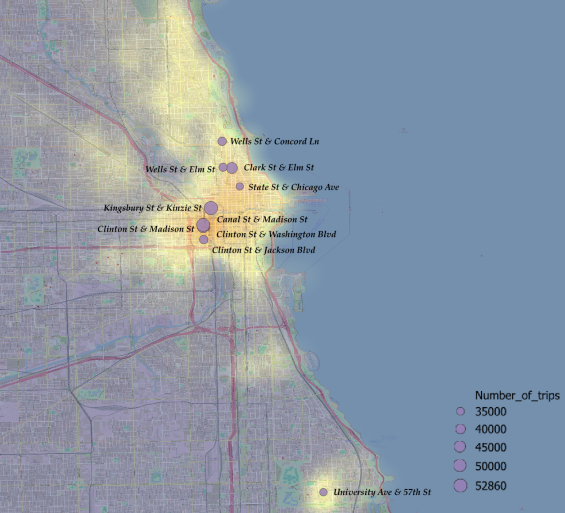

As we can see, the vast majority of trips are made in the center, in the northern part adjacent to the city center, as well as in the University of Chicago area. If we consider how members and casuals differ, we see that the most popular stations for casuals are located along and near the Lake Michigan waterfront, which indirectly confirms the theory that they use bicycles as a means of leisure. At the same time, the most popular stations among members are located deeper in the city, with a particularly high concentration in the area of major transportation hubs Ogilvie Transportation Center and Chicago Union Station. 

This data will be useful in forming a marketing strategy to determine the most effective locations for the company.